In [1]:
# Импортируем необходимые библиотеки
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Задаем рабочую папку
os.chdir('/content/drive/MyDrive/class/areopag/time_series')

***1. Подготвка данных***

In [3]:
# Открываем файл для обработки
df_price = pd.read_csv('raw_sales.csv')

In [4]:
# Смотрим полученный результат
df_price.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
# Посмотрим информацию о полученных данных
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [6]:
# Изменим тип данных в столбце "datesold" на тип данных datetime64
df_price['datesold'] = pd.to_datetime(df_price['datesold'])

In [7]:
# Проверим уникальные значения для дальнейшей подготовки данных
df_price['bedrooms'].unique(), df_price['propertyType'].unique(), df_price['postcode'].unique(), df_price.columns

(array([4, 3, 5, 1, 2, 0]),
 array(['house', 'unit'], dtype=object),
 array([2607, 2906, 2905, 2606, 2902, 2612, 2904, 2615, 2914, 2602, 2600,
        2605, 2603, 2611, 2903, 2617, 2913, 2604, 2614, 2912, 2601, 2900,
        2620, 2618, 2616, 2911, 2609]),
 Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms'], dtype='object'))

In [8]:
# Разобъем все данные по количеству комнатам и типу помещения
df_0_house = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 0) & (df_price['propertyType'] == 'house')]
df_0_unit = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 0) & (df_price['propertyType'] == 'unit')]

df_1_house = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 1) & (df_price['propertyType'] == 'house')]
df_1_unit = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 1) & (df_price['propertyType'] == 'unit')]

df_2_house = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 2) & (df_price['propertyType'] == 'house')]
df_2_unit = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 2) & (df_price['propertyType'] == 'unit')]

df_3_house = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 3) & (df_price['propertyType'] == 'house')]
df_3_unit = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 3) & (df_price['propertyType'] == 'unit')]

df_4_house = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 4) & (df_price['propertyType'] == 'house')]
df_4_unit = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 4) & (df_price['propertyType'] == 'unit')]

df_5_house = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 5) & (df_price['propertyType'] == 'house')]
df_5_unit = df_price[['datesold', 'postcode', 'price']][(df_price['bedrooms'] == 5) & (df_price['propertyType'] == 'unit')]

In [ ]:
# Посмотрим количество строк
df_0_house.shape, df_0_unit.shape, df_1_house.shape, df_1_unit.shape, df_2_house.shape, df_2_unit.shape, df_3_house.shape, df_3_unit.shape, df_4_house.shape, df_4_unit.shape, df_5_house.shape, df_5_unit.shape

In [10]:
# Создадим список с датасетами
list_df = [df_0_house, df_0_unit, df_1_house, df_1_unit, df_2_house, df_2_unit, df_3_house, df_3_unit, df_4_house, df_4_unit, df_5_house, df_5_unit]

In [11]:
# Преобразуем тип данных
for df in list_df:
  df['datesold'] == pd.to_datetime(df['datesold'])

In [12]:
# Сделаем столбец "datesold" индексом
df_0_house = df_0_house.set_index('datesold')
df_0_unit = df_0_unit.set_index('datesold')

df_1_house = df_1_house.set_index('datesold')
df_1_unit = df_1_unit.set_index('datesold')

df_2_house = df_2_house.set_index('datesold')
df_2_unit = df_2_unit.set_index('datesold')

df_3_house = df_3_house.set_index('datesold')
df_3_unit = df_3_unit.set_index('datesold')

df_4_house = df_4_house.set_index('datesold')
df_4_unit = df_4_unit.set_index('datesold')

df_5_house = df_5_house.set_index('datesold')
df_5_unit = df_5_unit.set_index('datesold')

In [13]:
# Создадим датасеты пустые, где столбцами будут почтовые индексы. Упакуем в список
house_0 = pd.DataFrame(columns=[x for x in df_0_house['postcode'].unique()], index=df_0_house.index)
unit_0 = pd.DataFrame(columns=[x for x in df_0_unit['postcode'].unique()], index=df_0_unit.index)
house_1 = pd.DataFrame(columns=[x for x in df_1_house['postcode'].unique()], index=df_1_house.index)
unit_1 = pd.DataFrame(columns=[x for x in df_1_unit['postcode'].unique()], index=df_1_unit.index)
house_2 = pd.DataFrame(columns=[x for x in df_2_house['postcode'].unique()], index=df_2_house.index)
unit_2 = pd.DataFrame(columns=[x for x in df_2_unit['postcode'].unique()], index=df_2_unit.index)
house_3 = pd.DataFrame(columns=[x for x in df_3_house['postcode'].unique()], index=df_3_house.index)
unit_3 = pd.DataFrame(columns=[x for x in df_3_unit['postcode'].unique()], index=df_3_unit.index)
house_4 = pd.DataFrame(columns=[x for x in df_4_house['postcode'].unique()], index=df_4_house.index)
unit_4 = pd.DataFrame(columns=[x for x in df_4_unit['postcode'].unique()], index=df_4_unit.index)
house_5 = pd.DataFrame(columns=[x for x in df_5_house['postcode'].unique()], index=df_5_house.index)
unit_5 = pd.DataFrame(columns=[x for x in df_5_unit['postcode'].unique()], index=df_5_unit.index)
list_postcode = [house_0, unit_0, house_1, unit_1, house_2, unit_2, house_3, unit_3, house_4, unit_4, house_5, unit_5]

In [14]:
# Заполним датасеты стоимостью по датам и почтовым индексам
for num in range(len(list_df)):
  for x in range(len(list_df[num])):
    if list_df[num]['postcode'].iloc[x] in list_postcode[num].columns:
      list_postcode[num][list_df[num]['postcode'].iloc[x]].iloc[x] = list_df[num]['price'].iloc[x]

In [15]:
# Сгруппируем по месяцам
house_0 = house_0.resample(rule='M').mean()
unit_0 = unit_0.resample(rule='M').mean()

house_1 = house_1.resample(rule='M').mean()
unit_1 = unit_1.resample(rule='M').mean()

house_2 = house_2.resample(rule='M').mean()
unit_2 = unit_2.resample(rule='M').mean()

house_3 = house_3.resample(rule='M').mean()
unit_3 = unit_3.resample(rule='M').mean()

house_4 = house_4.resample(rule='M').mean()
unit_4 = unit_4.resample(rule='M').mean()

house_5 = house_5.resample(rule='M').mean()
unit_5 = unit_5.resample(rule='M').mean()

In [16]:
# Сгруппируем основные данные по месяцам
month = df_price.set_index('datesold').resample(rule='M').mean()

<ipython-input-16-a5fcf7ba89b5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month = df_price.set_index('datesold').resample(rule='M').mean()


In [17]:
# Создадим датасет по которому будем создавать данные без потерь по месяцам
df_all = pd.DataFrame(index=month.index)

In [18]:
# Создадим данные с учетом всех месяцев, данные на которые есть информация с учетом всех типов помещений и количества комнат
df_house_0 = pd.concat([df_all, house_0], axis=1)
df_unit_0 = pd.concat([df_all, unit_0], axis=1)

df_house_1 = pd.concat([df_all, house_1], axis=1)
df_unit_1 = pd.concat([df_all, unit_1], axis=1)

df_house_2 = pd.concat([df_all, house_2], axis=1)
df_unit_2 = pd.concat([df_all, unit_2], axis=1)

df_house_3 = pd.concat([df_all, house_3], axis=1)
df_unit_3 = pd.concat([df_all, unit_3], axis=1)

df_house_4 = pd.concat([df_all, house_4], axis=1)
df_unit_4 = pd.concat([df_all, unit_4], axis=1)

df_house_5 = pd.concat([df_all, house_5], axis=1)
df_unit_5 = pd.concat([df_all, unit_5], axis=1)

In [ ]:
# Посмотрим по количеству строк и столбцов
df_house_0.shape, df_unit_0.shape, df_house_1.shape, df_unit_1.shape, df_house_2.shape, df_unit_2.shape, df_house_3.shape, df_unit_3.shape, df_house_4.shape, df_unit_4.shape, df_house_5.shape, df_unit_5.shape

In [20]:
# Заполним пустые значения с помощью интерполяции и минимальным значением
df_house_0 = round(df_house_0.interpolate(method='linear', limit_direction='forward').fillna(df_house_0.min()), 1)
df_unit_0 = round(df_unit_0.interpolate(method='linear', limit_direction='forward').fillna(df_unit_0.min()), 1)

df_house_1 = round(df_house_1.interpolate(method='linear', limit_direction='forward').fillna(df_house_1.min()), 1)
df_unit_1 = round(df_unit_1.interpolate(method='linear', limit_direction='forward').fillna(df_unit_1.min()), 1)

df_house_2 = round(df_house_2.interpolate(method='linear', limit_direction='forward').fillna(df_house_2.min()), 1)
df_unit_2 = round(df_unit_2.interpolate(method='linear', limit_direction='forward').fillna(df_unit_2.min()), 1)

df_house_3 = round(df_house_3.interpolate(method='linear', limit_direction='forward').fillna(df_house_3.min()), 1)
df_unit_3 = round(df_unit_3.interpolate(method='linear', limit_direction='forward').fillna(df_unit_3.min()), 1)

df_house_4 = round(df_house_4.interpolate(method='linear', limit_direction='forward').fillna(df_house_4.min()), 1)
df_unit_4 = round(df_unit_4.interpolate(method='linear', limit_direction='forward').fillna(df_unit_4.min()), 1)

df_house_5 = round(df_house_5.interpolate(method='linear', limit_direction='forward').fillna(df_house_5.min()), 1)
df_unit_5 = round(df_unit_5.interpolate(method='linear', limit_direction='forward').fillna(df_unit_5.min()), 1)

In [21]:
# Упакуем в список все датасеты
list_varmax = [df_house_0, df_unit_0, df_house_1, df_unit_1, df_house_2, df_unit_2, df_house_3, df_unit_3, df_house_4, df_unit_4, df_house_5, df_unit_5]

In [22]:
# Уберем в рядах, где значения после интерполяции и замены на минимальное, одно значение или часто встречается.
for df in list_varmax:
  for column in df.columns:
    for num in range(len(df[column])):
      for i in df[column]:
        if i == df[column][num]:
          df[column][num] = i - np.random.randint(-500,500)

Данные подготвлены для выбора модели прогнозирования

***2. Выбираем модель для прогнозирования***

1. Модель VARMAX

In [23]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error

In [24]:
# Создадим датасеты для сохранения результатов предсказания
var_house_0 = pd.DataFrame()
var_unit_0 = pd.DataFrame()
var_house_1 = pd.DataFrame()
var_unit_1 = pd.DataFrame()
var_house_2 = pd.DataFrame()
var_unit_2 = pd.DataFrame()
var_house_3 = pd.DataFrame()
var_unit_3 = pd.DataFrame()
var_house_4 = pd.DataFrame()
var_unit_4 = pd.DataFrame()
var_house_5 = pd.DataFrame()
var_unit_5 = pd.DataFrame()

In [ ]:
# Упакуем в список
list_pred_var = [var_house_0, var_unit_0, var_house_1, var_unit_1, var_house_2, var_unit_2, var_house_3, var_unit_3, var_house_4, var_unit_4, var_house_5, var_unit_5]

# Зададим горизонт прогноза
horisont = 12

# Создадим список для сохранения среднего значения MSE для каждого датасета в сравнении с тестовыми данными
list_mse_varmax = []

# Проверием качество модели и сохраним полученные данные для построения графиков
for ind in range(len(list_varmax)):
  train = list_varmax[ind][:len(list_varmax[ind]) - horisont]
  test = list_varmax[ind][len(list_varmax[ind]) - horisont:]
  model_varmax = VARMAX(train, order=(1,0))
  fit_model_varmax = model_varmax.fit()
  predict_varmax = fit_model_varmax.predict(start=len(train), end=(len(train)+len(test))-1)
  result_varmax = round(predict_varmax)
  list_pred_var[ind] = result_varmax
  count = 0
  count_1 = 0
  for a in test.columns:
    for x in result_varmax.columns:
      if x == a:
        mse = mean_squared_error(test[a], result_varmax[x])
        count += mse
      count_1 += count
  list_mse_varmax.append(count_1/len(result_varmax.columns))

In [26]:
# Загрузим полученные данные в отдельные датасеты
varmax_house_0 = list_pred_var[0]
varmax_unit_0 = list_pred_var[1]
varmax_house_1 = list_pred_var[2]
varmax_unit_1 = list_pred_var[3]
varmax_house_2 = list_pred_var[4]
varmax_unit_2 = list_pred_var[5]
varmax_house_3 = list_pred_var[6]
varmax_unit_3 = list_pred_var[7]
varmax_house_4 = list_pred_var[8]
varmax_unit_4 = list_pred_var[9]
varmax_house_5 = list_pred_var[10]
varmax_unit_5 = list_pred_var[11]

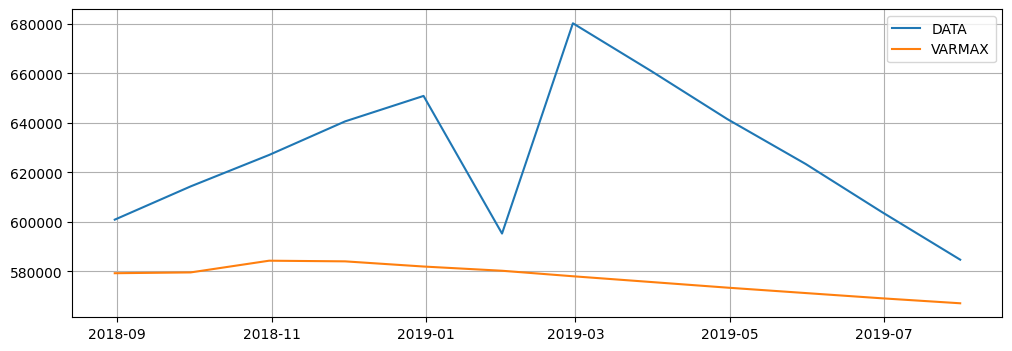

In [27]:
# Построим график с рандомным выбором типа помещений и почтового индекса
a = np.random.randint(0, len(list_pred_var)) # Выбор помещения
name = np.random.choice([x for x in list_pred_var[a].columns]) # Выбор почтового индекса

# Строим график

plt.figure(figsize=(12,4))
plt.plot(list_varmax[a][name][-12:], label='DATA') # выборка тестовая
plt.plot(list_pred_var[a][name], label='VARMAX') # полученный прогноз
plt.legend()
plt.grid()
plt.show()

- Предсказанный результат по модели VARMAX
- MSE в списке: list_mse_varmax

2. Модель LSTM

In [28]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [29]:
# Создадим датасеты для сохранения результатов предсказания
lstm_house_0 = pd.DataFrame(index=varmax_house_0.index)
lstm_unit_0 = pd.DataFrame(index=varmax_house_0.index)
lstm_house_1 = pd.DataFrame(index=varmax_house_0.index)
lstm_unit_1 = pd.DataFrame(index=varmax_house_0.index)
lstm_house_2 = pd.DataFrame(index=varmax_house_0.index)
lstm_unit_2 = pd.DataFrame(index=varmax_house_0.index)
lstm_house_3 = pd.DataFrame(index=varmax_house_0.index)
lstm_unit_3 = pd.DataFrame(index=varmax_house_0.index)
lstm_house_4 = pd.DataFrame(index=varmax_house_0.index)
lstm_unit_4 = pd.DataFrame(index=varmax_house_0.index)
lstm_house_5 = pd.DataFrame(index=varmax_house_0.index)
lstm_unit_5 = pd.DataFrame(index=varmax_house_0.index)

In [30]:
# Создаем функцию для масштабирования
def scaler(data):
  data_ = data.values
  min_ = data_.min()
  max_ = data_.max()
  scal = (data_ - min_)/(max_ - min_)
  return scal

In [31]:
# Создаем функцию для приобразования данных для модели LSTM
def data_lstm(df_, step=1):

  dataset = []
  label = []

  for i in range(len(df_)-step):
    a = [[x] for x in df_[i:i + step]]
    b = df_[i + step]
    dataset.append(a)
    label.append(b)

  return np.array(dataset), np.array(label)

In [ ]:
# С помощью цикла проведем прогноз по тестовой выборке

# Упакуем в список
list_pred_lstm = [lstm_house_0, lstm_unit_0, lstm_house_1, lstm_unit_1, lstm_house_2, lstm_unit_2, lstm_house_3, lstm_unit_3, lstm_house_4, lstm_unit_4, lstm_house_5, lstm_unit_5]

# Зададим шаг
step = 5

# Создадим список для сохранения среднего значения MSE для каждого датасета в сравнении с тестовыми данными
list_mse_lstm = []


for ind in range(len(list_varmax)):
  for post in list_varmax[ind].columns:
    df_pred = list_varmax[ind][post]
    max_ = df_pred.max()
    min_ = df_pred.min()
    scal = scaler(df_pred)
    X, y = data_lstm(scal, step)
    X_train, y_train = X[:len(X)-12], y[:len(y)-12]
    X_test, y_test = X[len(X)-12:], y[len(y)-12:]
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(step,1)))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=100)
    pred = model.predict(X_test).flatten()
    not_scal = pred*(max_ - min_) + min_
    list_pred_lstm[ind][post] = not_scal
    count = 0
    count_1 = 0
    for a in list_varmax[ind].columns:
      for x in list_pred_lstm[ind].columns:
        if x == a:
          mse = mean_squared_error(list_varmax[ind][a].tail(12), list_pred_lstm[ind][x])
          count += mse
        count_1 += count
  list_mse_lstm.append(count_1/len(list_pred_lstm[ind].columns))

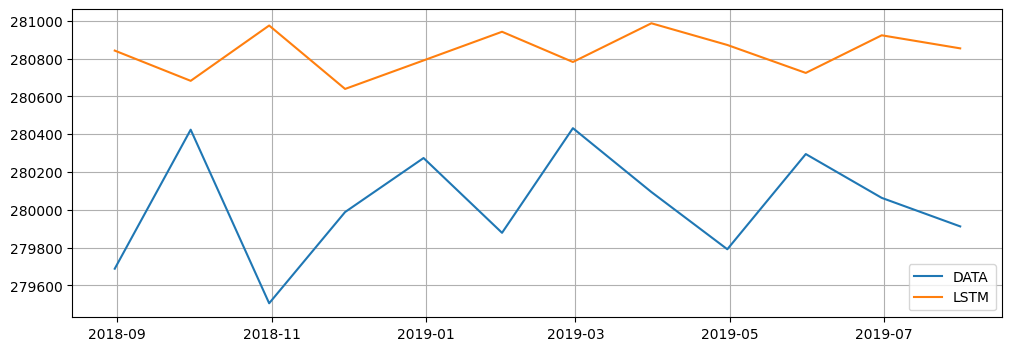

In [33]:
# Построим график с рандомным выбором типа помещений и почтового индекса
a = np.random.randint(0, len(list_pred_lstm)) # Выбор помещения
name = np.random.choice([x for x in list_pred_lstm[a].columns]) # Выбор почтового индекса

# Строим график

plt.figure(figsize=(12,4))
plt.plot(list_varmax[a][name][-12:], label='DATA') # выборка тестовая
plt.plot(list_pred_lstm[a][name], label='LSTM') # полученный прогноз
plt.legend()
plt.grid()
plt.show()

- Предсказанный результат по модели LSTM
- MSE в списке: list_mse_lstm

In [35]:
# Сарвним результаты ошибок MSE у моделей VARMAX и LSTM. Посмотрим как модель показала наименьший результат по датасетам.
count_var = 0
count_lstm = 0

for index in range(len(list_mse_varmax)):
  if list_mse_varmax[index] < list_mse_lstm[index]:
    count_var += 1
  else:
    count_lstm += 1

print(f"Ошибки MSE модели VARMAX меньше ошибок модели LSTM - {count_var}")
print(f"Ошибки MSE модели LSTM меньше ошибок модели VARMAX - {count_lstm}")

Ошибки MSE модели VARMAX меньше ошибок модели LSTM - 0
Ошибки MSE модели LSTM меньше ошибок модели VARMAX - 12


3. Построим график с рандомным выбором типа помещения и количества комнат

In [36]:
for i in range(len(list_pred_lstm)):
  list_pred_lstm[i].index = list_pred_var[i].index

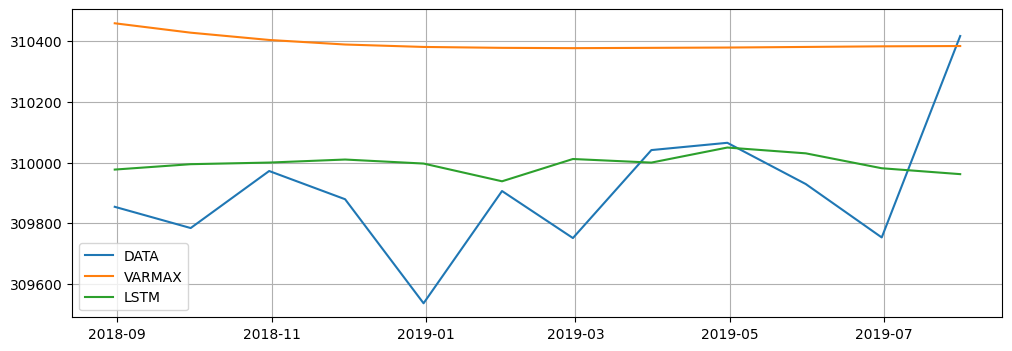

In [39]:
a = np.random.randint(0, len(list_pred_var)) # Выбор помещения
name = np.random.choice([x for x in list_pred_var[a].columns]) # Выбор почтового индекса

# Строим график

plt.figure(figsize=(12,4))
plt.plot(list_varmax[a][name][-12:], label='DATA')
plt.plot(list_pred_var[a][name], label='VARMAX')
plt.plot(list_pred_lstm[a][name], label='LSTM')
plt.legend()
plt.grid()
plt.show()

ВЫВОД: Для прогнозирования выбираем модель LSTM

***3. Прогнозируем результат на 12 месяцев с помощью модели LSTM***

In [40]:
# Создадим датасеты для хранения полученных результатов
predict_house_0 = pd.DataFrame()
predict_unit_0 = pd.DataFrame()
predict_house_1 = pd.DataFrame()
predict_unit_1 = pd.DataFrame()
predict_house_2 = pd.DataFrame()
predict_unit_2 = pd.DataFrame()
predict_house_3 = pd.DataFrame()
predict_unit_3 = pd.DataFrame()
predict_house_4 = pd.DataFrame()
predict_unit_4 = pd.DataFrame()
predict_house_5 = pd.DataFrame()
predict_unit_5 = pd.DataFrame()

In [ ]:
# С помощью цикла проведем прогноз по тестовой выборке

# Упакуем в список
list_pred = [predict_house_0, predict_unit_0, predict_house_1, predict_unit_1, predict_house_2, predict_unit_2, predict_house_3, predict_unit_3, predict_house_4, predict_unit_4, predict_house_5, predict_unit_5]

# Зададим шаг
step = 5

# Зададим срок прогноза
month = 13

for ind in range(len(list_pred)):
  for post in list_varmax[ind].columns:
    df_pred = list_varmax[ind][post]
    max_ = df_pred.max()
    min_ = df_pred.min()
    scal = scaler(df_pred)
    X, y = data_lstm(scal, 5)
    X_train, y_train = X[:len(X)-1], y[:len(y)-1]
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(5,1)))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=100)
    X_test = X[len(X)-1:len(X)]
    pred = model.predict(X_test).flatten()
    res_test = np.reshape(X_test, (5))
    a = [x for x in res_test]
    test = [a[1], a[2], a[3], a[4], pred[0]]
    list_ = []

    for i in range(month):
      list_test = []
      tests = test
      resh = [[x] for x in tests]
      list_test.append(resh)
      test_pred = np.array(list_test)
      pred_1 = model.predict(test_pred).flatten()
      not_scal = pred_1[0]*(max_ - min_) + min_
      test = [test[1], test[2], test[3], test[4], pred_1[0]]
      list_.append(not_scal)

    list_pred[ind][post] = list_


In [45]:
# Создадим датасет с датами для прогноза
df_date = pd.DataFrame({'date': pd.date_range(start='2019-07-31', freq="M", periods=13)})

In [47]:
# Сделаем столбец с датами индексом
df_date = df_date.set_index('date')

In [48]:
# В полученных датасетах добавим индексы с датами на прогноз
predict_house_0.index = df_date.index
predict_unit_0.index = df_date.index
predict_house_1.index = df_date.index
predict_unit_1.index = df_date.index
predict_house_2.index = df_date.index
predict_unit_2.index = df_date.index
predict_house_3.index = df_date.index
predict_unit_3.index = df_date.index
predict_house_4.index = df_date.index
predict_unit_4.index = df_date.index
predict_house_5.index = df_date.index
predict_unit_5.index = df_date.index

In [49]:
# Изменим полчуеный результат по среднему квартальному значению
predict_house_0 = round(predict_house_0.resample(rule='3M').mean())
predict_unit_0 = round(predict_unit_0.resample(rule='3M').mean())

predict_house_1 = round(predict_house_1.resample(rule='3M').mean())
predict_unit_1 = round(predict_unit_1.resample(rule='3M').mean())

predict_house_2 = round(predict_house_2.resample(rule='3M').mean())
predict_unit_2 = round(predict_unit_2.resample(rule='3M').mean())

predict_house_3 = round(predict_house_3.resample(rule='3M').mean())
predict_unit_3 = round(predict_unit_3.resample(rule='3M').mean())

predict_house_4 = round(predict_house_4.resample(rule='3M').mean())
predict_unit_4 = round(predict_unit_4.resample(rule='3M').mean())

predict_house_5 = round(predict_house_5.resample(rule='3M').mean())
predict_unit_5 = round(predict_unit_5.resample(rule='3M').mean())

In [50]:
# Изменим имеющиеся данные по среднему квартальному значению
house_0_f = round(df_house_0.resample(rule="3M").mean())
unit_0_f = round(df_unit_0.resample(rule="3M").mean())

house_1_f = round(df_house_1.resample(rule="3M").mean())
unit_1_f = round(df_unit_1.resample(rule="3M").mean())

house_2_f = round(df_house_2.resample(rule="3M").mean())
unit_2_f = round(df_unit_2.resample(rule="3M").mean())

house_3_f = round(df_house_3.resample(rule="3M").mean())
unit_3_f = round(df_unit_3.resample(rule="3M").mean())

house_4_f = round(df_house_4.resample(rule="3M").mean())
unit_4_f = round(df_unit_4.resample(rule="3M").mean())

house_5_f = round(df_house_5.resample(rule="3M").mean())
unit_5_f = round(df_unit_5.resample(rule="3M").mean())

list_first_data = [house_0_f, unit_0_f, house_1_f, unit_1_f, house_2_f, unit_2_f, house_3_f, unit_3_f, house_4_f, unit_4_f, house_5_f, unit_5_f]

- Построим график с рандомным выбором


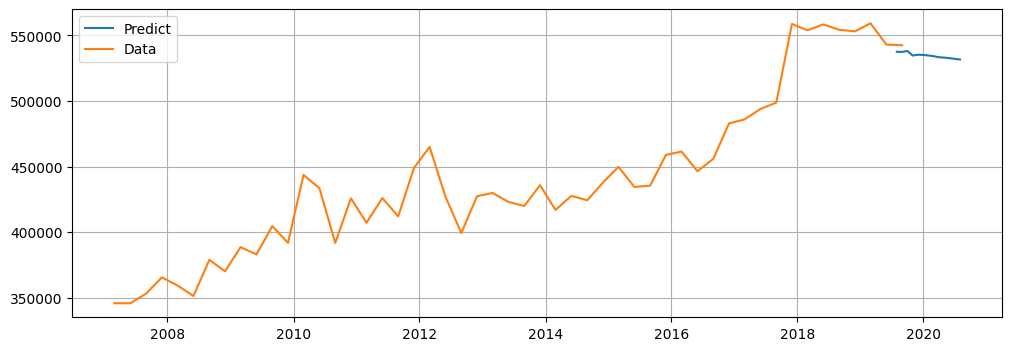

In [55]:
a = np.random.randint(0, len(list_pred)) # Выбор помещения
name = np.random.choice([x for x in list_pred[a].columns]) # Выбор почтового индекса

# Строим график

plt.figure(figsize=(12,4))
plt.plot(list_pred[a][name], label='Predict')
plt.plot(list_first_data[a][name], label='Data')
plt.legend()
plt.grid()
plt.show()

***4. Занесем полученный результат в одну таблицу***

In [ ]:
# Посмотрим количество столбцов, для создания датасета с наибольшим количеством показателей почтового индекса
df_house_0.shape, df_unit_0.shape, df_house_1.shape, df_unit_1.shape, df_house_2.shape, df_unit_2.shape, df_house_3.shape, df_unit_3.shape, df_house_4.shape, df_unit_4.shape, df_house_5.shape, df_unit_5.shape

In [93]:
# Создадим датасет в который загрузим все результаты
df_forecast = pd.DataFrame(columns=df_house_3.columns)

In [94]:
# Объединим таблицы
df_forecast = pd.concat([df_forecast, predict_house_0, predict_unit_0, predict_house_1, predict_unit_1, predict_house_2, predict_unit_2, predict_house_3, predict_unit_3, predict_house_4, predict_unit_4, predict_house_5, predict_unit_5], keys=['None', 'House-0', 'Unit-0', 'House-1', 'Unit-1', 'House-2', 'Unit-2', 'House-3', 'Unit-3', 'House-4', 'Unit-4', 'House-5', 'Unit-5'])

In [96]:
# Посмотрим полученный результат
df_forecast.head(10)

2906  2905      2607  2902       2602      2605  2611  \
House-0 2019-07-31  524976.0   NaN  905002.0   NaN  1158740.0  839955.0   NaN   
        2019-10-31  524970.0   NaN  905003.0   NaN  1162179.0  839957.0   NaN   
        2020-01-31  524969.0   NaN  904996.0   NaN  1167969.0  839962.0   NaN   
        2020-04-30  524969.0   NaN  904996.0   NaN  1172659.0  839962.0   NaN   
        2020-07-31  524969.0   NaN  904996.0   NaN  1176824.0  839962.0   NaN   
Unit-0  2019-07-31       NaN   NaN       NaN   NaN   341974.0  175176.0   NaN   
        2019-10-31       NaN   NaN       NaN   NaN   341972.0  175216.0   NaN   
        2020-01-31       NaN   NaN       NaN   NaN   341970.0  175252.0   NaN   
        2020-04-30       NaN   NaN       NaN   NaN   341970.0  175282.0   NaN   
        2020-07-31       NaN   NaN       NaN   NaN   341970.0  175308.0   NaN   

                        2606      2913      2604  ...  2912  2903      2914  \
House-0 2019-07-31  630044.0  465826.0  344426.0  ...   NaN   NaN  750020.0   
        2019-10-31  630042.0  466256.0  344288.0  ...   NaN   NaN  750010.0   
        2020-01-31  630040.0  467022.0  344081.0  ...   NaN   NaN  749981.0   
        2020-04-30  630040.0  467724.0  343895.0  ...   NaN   NaN  749985.0   
        2020-07-31  630039.0  468424.0  343732.0  ...   NaN   NaN  749986.0   
Unit-0  2019-07-31  514831.0       NaN  308057.0  ...   NaN   NaN       NaN   
        2019-10-31  516814.0       NaN  308022.0  ...   NaN   NaN       NaN   
        2020-01-31  520383.0       NaN  308012.0  ...   NaN   NaN       NaN   
        2020-04-30  523403.0       NaN  308014.0  ...   NaN   NaN       NaN   
        2020-07-31  526185.0       NaN  308013.0  ...   NaN   NaN       NaN   

                    2900       2612  2620  2616  2618  2911  2609  
House-0 2019-07-31   NaN  1159166.0   NaN   NaN   NaN   NaN   NaN  
        2019-10-31   NaN  1156771.0   NaN   NaN   NaN   NaN   NaN  
        2020-01-31   NaN  1151830.0   NaN   NaN   NaN   NaN   NaN  
        2020-04-30   NaN  1147035.0   NaN   NaN   NaN   NaN   NaN  
        2020-07-31   NaN  1145140.0   NaN   NaN   NaN   NaN   NaN  
Unit-0  2019-07-31   NaN   225766.0   NaN   NaN   NaN   NaN   NaN  
        2019-10-31   NaN   230536.0   NaN   NaN   NaN   NaN   NaN  
        2020-01-31   NaN   240090.0   NaN   NaN   NaN   NaN   NaN  
        2020-04-30   NaN   248769.0   NaN   NaN   NaN   NaN   NaN  
        2020-07-31   NaN   257045.0   NaN   NaN   NaN   NaN   NaN  

[10 rows x 27 columns]

In [97]:
# Сохраним результат в excel таблицу
df_forecast.to_excel('forecast_price.xlsx')

Прогноз закончен